In [10]:
from Py_FundSelection import FundSelection
from Py_Portfolio import Portfolio
from functools import reduce
import pandas as pd

# Man Dynamic Fund lacks back data 
LOW_VOLATILITY_PORTFOLIO_YEARS = 3

N_PORTFOLIOS = 1000000
RISK_FREE_RATE = 0.0375 

# Low Vol
low_vol_abridged_fund_selection = [
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc', 0.4),
    #FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc', 0.2),
    FundSelection('JPM Europe Equity Absolute Alpha C (perf) (dist) - GBP (hedged)', 0.4),
    #FundSelection('Man High Yield Opports Profl Acc C'), 
    FundSelection('GAM Star Cat Bond Institutional GBP Acc', 0.20),
    #FundSelection('Royal London Sterl Extra Yld Bd A Acc', 0.5),
    #FundSelection('Man Sterling Corp Bd Profl Acc C', 0.5),
    #FundSelection('Royal London Diversified ABS Fund Z Acc', 0.5), # Large chunk of prices missing from Yahoo finance
    #FundSelection('Royal London Abs Ret Govt Bd M GBP Acc', 0.5),
]

# Benchmark 4PHUXACHE
benchmark = [
    FundSelection('Ranmore Global Equity Investor GBP', 0.25),
    FundSelection('L&G Global 100 Index I Acc', 0.13, proxy_funds=[FundSelection('Fidelity Global Technology W-Acc-GBP', 1.0)]),
    FundSelection('MFS Meridian Contrarian Value W1 GBP', 0.06),
    FundSelection('FAST - Global Fund Y-PF-ACC-GBP', 0.06),
    FundSelection('YFS Argonaut Absolute Return I GBP Acc', 0.10),
    FundSelection('BH Macro GBP Ord', 0.10),
    FundSelection('WisdomTree Physical Gold GBP Daily Hdgd', 0.10),
    FundSelection('Winton Trend UCITS I GBP Acc', 0.05),
    FundSelection('iShares Blmbrg Enh Roll Yld Cmd Swap ETF GBP',0.05),
    FundSelection('JupiterMerian Glb Eq AbsRt I £ H Acc', 0.05),
    FundSelection('Prem Miton Tellworth UK Sel Fd - Cl AAcc', 0.05)
]

# Only data from 2022, so proxy earlier years with the best Sharpe ratio weghtings from the other funds
man_dynamic_income = FundSelection('Man Dynamic Income I H GBP Cap', proxy_funds=low_vol_abridged_fund_selection)

low_vol_full_fund_selection = low_vol_abridged_fund_selection + [
    man_dynamic_income
]

# Abridged Portfolio excludes Man Dynamic - calculate max Sharpe Ratio and associated weights to backfill proxy fund weights in full portfolio
low_vol_abridged_portfolio = Portfolio(low_vol_abridged_fund_selection, benchmark, LOW_VOLATILITY_PORTFOLIO_YEARS, N_PORTFOLIOS, RISK_FREE_RATE)

# Full Portfolio - 1st 3 years of Man Dynamic Income fund backfilled with the proxy fund weights from the abridged portfolio
low_vol_portfolio = Portfolio(low_vol_full_fund_selection, benchmark, LOW_VOLATILITY_PORTFOLIO_YEARS, N_PORTFOLIOS, RISK_FREE_RATE)

C:\Users\Pandelus\AppData\Roaming\Python\Python313\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.754%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
c:\Users\Pandelus\source\repos\Portfolio\Jupyter\Py_Portfolio.py:692: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=max_sharpe_portf['AverageReturns'][asset_index],


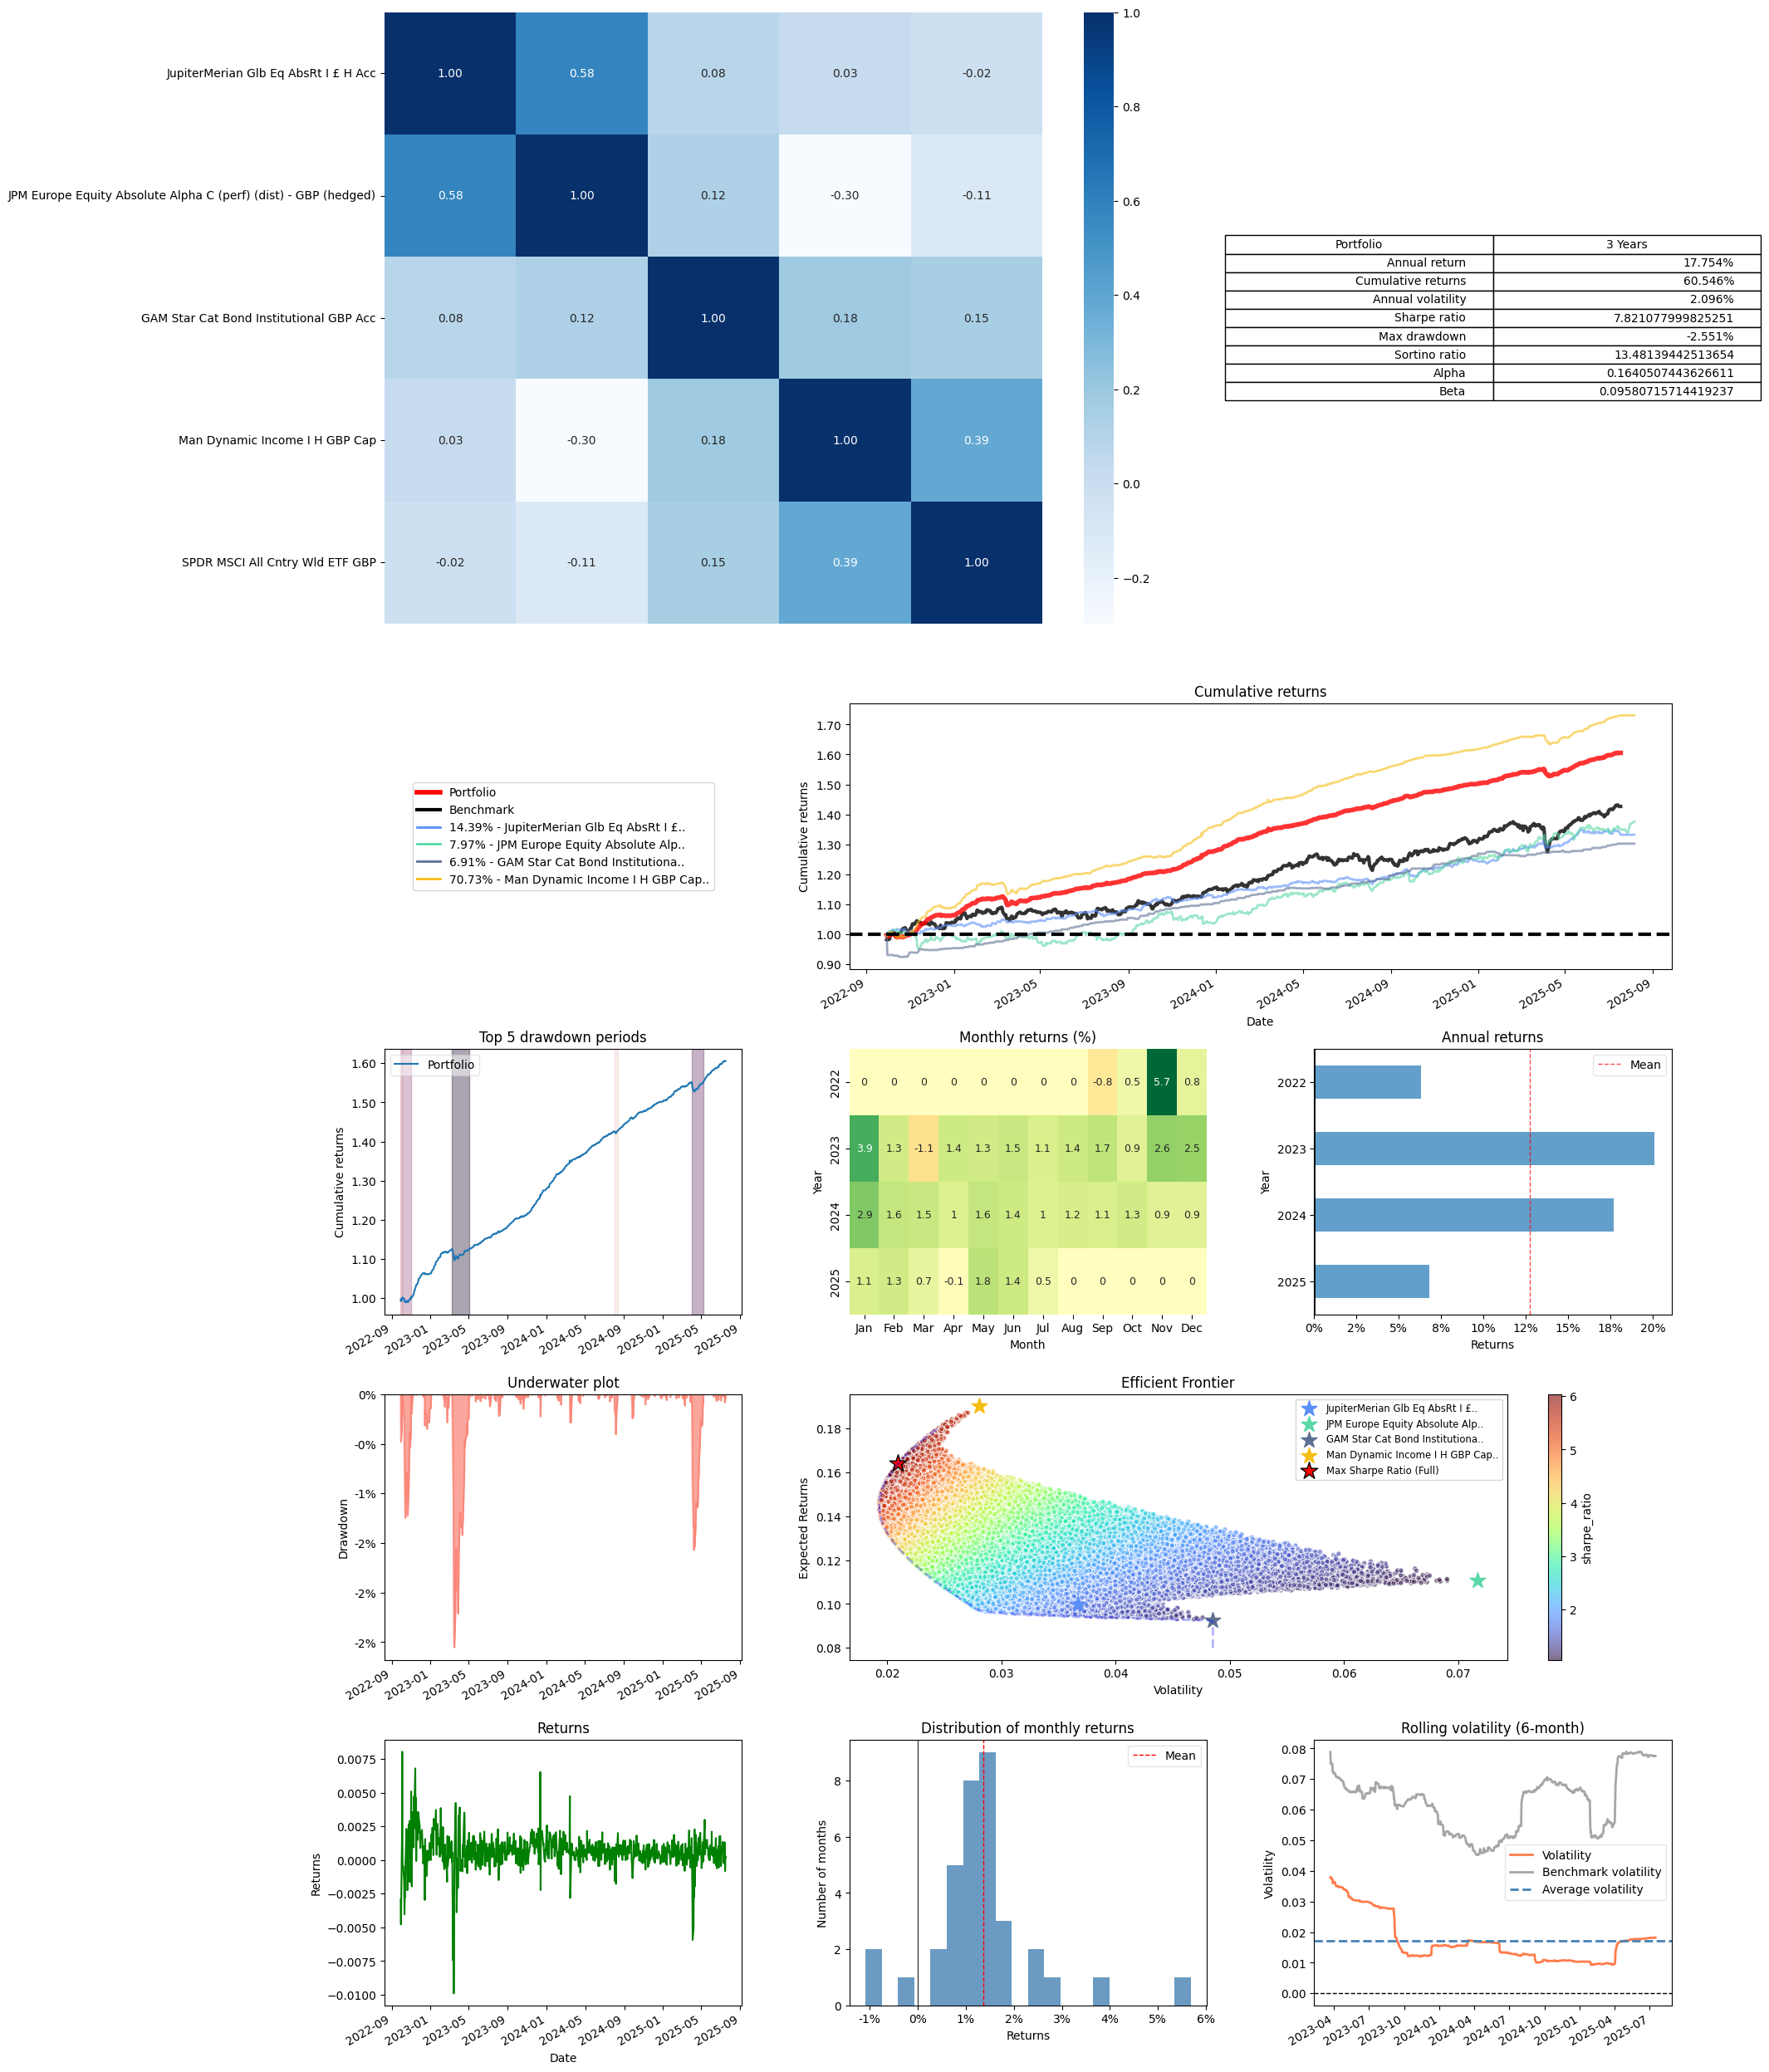

In [11]:
low_vol_portfolio.plot_returns_tear_sheet()

In [12]:
low_vol_results = low_vol_portfolio.export('LowVol')

combined_results = pd.concat([low_vol_results])

combined_results.to_excel('lowVol.xlsx', index=True)

c:\Users\Pandelus\source\repos\Portfolio\Jupyter\Py_Portfolio.py:734: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06925615788268484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[name, 'YTD'] = ytd
c:\Users\Pandelus\source\repos\Portfolio\Jupyter\Py_Portfolio.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.707347773149019' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[name, 'Weight'] = name_weight[name]
